**Nama : Yohan Permana**

In [1]:
!pip install -q kaggle
#digunakan untuk menginstal paket Python bernama "kaggle" menggunakan perintah pip dari dalam lingkungan Jupyter Notebook atau notebook berbasis Python lainnya.


In [2]:
# digunakan untuk mengunggah file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yohanpermanautm","key":"96b272946aaf5c7a832385bc9086a36e"}'}

In [3]:
#digunakan untuk membuat dan mengonfigurasi direktori .kaggle serta mengelola file kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets list

ref                                                         title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hummaamqaasim/jobs-in-data                                  Jobs and Salaries in Data Science            76KB  2023-12-25 20:03:32           5572        101  1.0              
thedrcat/daigt-v2-train-dataset                             DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           4156        323  1.0              
jacksondivakarr/car-crash-dataset                           Car Crash Dataset                             4MB  2024-01-08 13:44:08           1685         38  1.0              
nelgiriyewithana/new-york-housing-market                    New York Housing Market                     271KB  2024-01-0

In [5]:
#erintah ini digunakan untuk mengunduh dataset dengan nama bbcnewsarchive dari Kaggle menggunakan perintah kaggle datasets download.
!kaggle datasets download -d hgultekin/bbcnewsarchive

  0% 0.00/1.81M [00:00<?, ?B/s]
100% 1.81M/1.81M [00:00<00:00, 125MB/s]


In [6]:
# digunakan untuk membuat direktori baru bernama bbcnewsarchive, mengekstrak isi dari file bbcnewsarchive.zip ke dalam direktori tersebut, dan menampilkan daftar file yang telah diekstrak.
!mkdir bbcnewsarchive
!unzip bbcnewsarchive.zip -d bbcnewsarchive
!ls bbcnewsarchive


Archive:  bbcnewsarchive.zip
  inflating: bbcnewsarchive/bbc-news-data.csv  
bbc-news-data.csv


In [7]:
# Import library
import pandas as pd
from tabulate import tabulate

# Load dataset
file_path = 'bbcnewsarchive/bbc-news-data.csv'
df = pd.read_csv(file_path, sep='\t')

# Menampilkan 10 baris pertama dataset dalam format tabel
print("Top 10 rows of the dataset:")
print(tabulate(df.head(10), headers='keys', tablefmt='fancy_grid'))


Top 10 rows of the dataset:
╒════╤════════════╤════════════╤═══════════════════════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

In [8]:
df.info()
df.category.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null   object
 3   content   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [9]:
# hapus kolom (kolom yang tidak digunakan) menggunakan metode pop
df_new = df.copy()
df_new.pop('filename')

0       001.txt
1       002.txt
2       003.txt
3       004.txt
4       005.txt
         ...   
2220    397.txt
2221    398.txt
2222    399.txt
2223    400.txt
2224    401.txt
Name: filename, Length: 2225, dtype: object

In [10]:
df_new

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,Be careful how you code,A new European directive could put software w...
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...


*Proses cleansing data*

In [11]:
# mengimpor berbagai pustaka yang diperlukan untuk membangun model Pemrosesan Bahasa Alamiah (NLP) menggunakan Keras. Beberapa pustaka tersebut melibatkan pemrosesan teks, pembangunan model jaringan saraf, dan sumber daya bahasa seperti WordNet dan stopwords dari NLTK. Unduhan data tambahan seperti WordNet dan stopwords juga dilakukan.
import nltk, os, re, string
from keras.layers import Input, LSTM, Bidirectional, SpatialDropout1D, Dropout, Flatten, Dense, Embedding, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
# proses lowercase / merubah huruf kapital menjadi kecil
df_new.title = df_new.title.apply(lambda x: x.lower())
df_new.content = df_new.content.apply(lambda x: x.lower())

In [13]:
# Fungsi cleaner menghapus tanda baca dari data teks, dan kemudian diterapkan pada kolom 'title' dan 'content' dari DataFrame df_new menggunakan fungsi apply, diikuti oleh pemanggilan fungsi lem untuk lemmatisasi pada kolom 'content'.
def cleaner(data):
    return(data.translate(str.maketrans('','', string.punctuation)))
    df_new.title = df_new.title.apply(lambda x: cleaner(x))
    df_new.content = df_new.content.apply(lambda x: lem(x))

In [14]:
# Inisialisasi objek lemmatizer menggunakan kelas WordNetLemmatizer dari pustaka NLTK untuk digunakan dalam proses lemmatisasi teks selanjutnya.
lemmatizer = WordNetLemmatizer()

# Fungsi lem melakukan lemmatisasi pada teks yang diberikan dengan mengonversi kata-kata ke bentuk dasarnya, menggunakan informasi pos (part-of-speech) yang diberikan oleh modul nltk.pos_tag. Kemudian, fungsi ini diterapkan pada kolom 'title' dan 'content' dari DataFrame df_new menggunakan fungsi apply
def lem(data):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(data.split())]))
    df_new.title = df_new.title.apply(lambda x: lem(x))
    df_new.content = df_new.content.apply(lambda x: lem(x))

In [15]:
# Fungsi rem_numbers menghapus semua angka dari teks yang diberikan dengan menggunakan ekspresi reguler. Namun, pemanggilan fungsi ini pada kolom 'title' dan 'content' dari DataFrame df_new tidak memodifikasi DataFrame itu sendiri, karena perlu menggunakan df_new['title'] = df_new['title'].apply(rem_numbers) dan df_new['content'] = df_new['content'].apply(rem_numbers) untuk menyimpan hasil perubahan.
def rem_numbers(data):
    return re.sub('[0-9]+','',data)
    df_new['title'].apply(rem_numbers)
    df_new['content'].apply(rem_numbers)

In [16]:
# Fungsi stopword digunakan untuk menghapus kata-kata umum (stopwords) dari teks yang diberikan, dan kemudian diterapkan pada kolom 'title' dari DataFrame df_new menggunakan fungsi apply
st_words = stopwords.words()
def stopword(data):
    return ' '.join([w for w in data.split() if w not in st_words])
df_new.title = df_new.title.apply(lambda x: stopword(x))
df_new.content = df_new.content.apply(lambda x: stopword(x))



In [17]:
# menampilkan data hasil cleansing
df_new

,category,title,content
0,business,sales boost time warner profit,quarterly profits media giant timewarner jumpe...
1,business,dollar gains greenspan speech,dollar hit highest level euro months federal r...
2,business,yukos unit buyer faces loan claim,owners embattled russian oil giant yukos buyer...
3,business,high fuel prices hit ba's profits,british airways blamed high fuel prices 40% dr...
4,business,pernod takeover talk lifts domecq,shares uk drinks food firm allied domecq risen...
...,...,...,...
2220,tech,bt program beat dialler scams,bt introducing initiatives beat rogue dialler ...
2221,tech,spam e-mails tempt net shoppers,computer users world continue ignore security ...
2222,tech,careful code,european directive put software writers risk l...
2223,tech,cyber security chief resigns,making computer networks safe secure resigned ...


*Proses Modeling & Plot*

In [18]:
#  membuat variabel dummy untuk kolom kategori menggunakan pd.get_dummies pada DataFrame df_new. Selanjutnya, DataFrame baru df_new_cat dibuat dengan menggabungkan DataFrame df_new dan variabel dummy menggunakan pd.concat, dan kemudian kolom 'category' dihapus untuk menghindari multicollinearity.
category = pd.get_dummies(df_new.category)
df_new_cat = pd.concat([df_new, category], axis=1)
df_new_cat = df_new_cat.drop(columns='category')

df_new_cat


,title,content,business,entertainment,politics,sport,tech
0,sales boost time warner profit,quarterly profits media giant timewarner jumpe...,1,0,0,0,0
1,dollar gains greenspan speech,dollar hit highest level euro months federal r...,1,0,0,0,0
2,yukos unit buyer faces loan claim,owners embattled russian oil giant yukos buyer...,1,0,0,0,0
3,high fuel prices hit ba's profits,british airways blamed high fuel prices 40% dr...,1,0,0,0,0
4,pernod takeover talk lifts domecq,shares uk drinks food firm allied domecq risen...,1,0,0,0,0
...,...,...,...,...,...,...,...
2220,bt program beat dialler scams,bt introducing initiatives beat rogue dialler ...,0,0,0,0,1
2221,spam e-mails tempt net shoppers,computer users world continue ignore security ...,0,0,0,0,1
2222,careful code,european directive put software writers risk l...,0,0,0,0,1
2223,cyber security chief resigns,making computer networks safe secure resigned ...,0,0,0,0,1


In [19]:
#menggabungkan teks dari kolom 'title' dan 'content' dalam DataFrame df_new_cat ke dalam variabel news, dan menyimpan label kategori dalam variabel label sebagai array nilai untuk kategori bisnis, hiburan, politik, olahraga, dan teknologi.
news = df_new_cat['title'].values + '' + df_new_cat['content'].values
label = df_new_cat[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [20]:
# melihat 5 elemen pertama dari array label
print(label[:5])

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [21]:
# melihat 5 elemen pertama dari susunan berita
print(news[:5])


['sales boost time warner profitquarterly profits media giant timewarner jumped 76% $1.13bn (£600m) months december, $639m year-earlier. firm, biggest investors google, benefited sales high-speed internet connections higher advert sales. timewarner fourth quarter sales rose 2% $11.1bn $10.9bn. profits buoyed one-off gains offset profit dip warner bros, users aol. time warner friday owns 8% search-engine google. internet business, aol, mixed fortunes. lost 464,000 subscribers fourth quarter profits lower preceding quarters. however, company aol\'s underlying profit exceptional items rose 8% back stronger internet advertising revenues. hopes increase subscribers offering online service free timewarner internet customers sign aol\'s existing customers high-speed broadband. timewarner restate 2000 2003 results probe securities exchange commission (sec), close concluding. time warner\'s fourth quarter profits slightly analysts\' expectations. film division profits slump 27% $284m, helped bo

*Proses Splitting Data*

In [22]:
# train_test_split dari modul sklearn.model_selection untuk membagi data menjadi set pelatihan dan validasi. Variabel news_train dan label_train akan berisi data pelatihan, sedangkan news_test dan label_test berisi data validasi. Parameter test_size=0.2 menunjukkan bahwa 20% dari data akan digunakan sebagai data validasi, dan shuffle=True mengindikasikan pengacakan data sebelum pembagian.
# Split data into training and validation
from sklearn.model_selection import train_test_split
news_train, news_test, label_train, label_test = train_test_split(news, label, test_size=0.2, shuffle=True)

In [23]:
# Tokenizer dari Keras untuk mengonversi teks menjadi urutan angka dan melaksanakan padding. Objek Tokenizer dibuat dengan membatasi jumlah kata, menetapkan token untuk kata di luar vocab, dan menghapus beberapa karakter. Kemudian, data pelatihan dan validasi digunakan untuk membentuk vocabularies dan mengonversi teks ke urutan angka menggunakan texts_to_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(news_train)
tokenizer.fit_on_texts(news_test)
sekuens_train = tokenizer.texts_to_sequences(news_train)
sekuens_test = tokenizer.texts_to_sequences(news_test)
padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

*Proses Modeling Tensor Flow (LSTM)*

In [24]:
#Import TensorFlow:
import tensorflow as tf

In [25]:
# Membuat Model Sequential
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])


In [26]:
#Mengompilasi Model:
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy',)

In [27]:
# Menampilkan Ringkasan Model:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 435973 (1.66 MB)
Trainable params: 435973 (1.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


*Proses Callback*

In [28]:
import tensorflow as tf

# Mendefinisikan kelas callback khusus
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Memeriksa akurasi pelatihan dan validasi
        if logs.get('accuracy') > 0.9 and logs.get('val_accuracy') > 0.9:
            # Menghentikan pelatihan jika kriteria terpenuhi
            self.model.stop_training = True
            # Mencetak pesan jika pelatihan dihentikan
            print("\nThe accuracy of the training set and the validation set has reached > 90%!")

# Membuat objek callback
callbacks = myCallback()


In [29]:
# Melatih model dengan metode fit
history = model.fit(
    padded_train,         # Data pelatihan
    label_train,          # Label pelatihan
    epochs=20,            # Jumlah epoch pelatihan
    validation_data=(padded_test, label_test),  # Data validasi
    verbose=2,            # Tingkat verbositas (2 untuk mencetak setiap epoch)
    callbacks=[callbacks],  # Menggunakan callback yang telah didefinisikan sebelumnya
    validation_steps=30    # Jumlah langkah validasi setiap epoch
)


Epoch 1/20
56/56 - 183s - loss: 1.5844 - accuracy: 0.2938 - val_loss: 1.5152 - val_accuracy: 0.3326 - 183s/epoch - 3s/step
Epoch 2/20
56/56 - 189s - loss: 1.1657 - accuracy: 0.5045 - val_loss: 0.8147 - val_accuracy: 0.5753 - 189s/epoch - 3s/step
Epoch 3/20
56/56 - 188s - loss: 0.5504 - accuracy: 0.7506 - val_loss: 0.5429 - val_accuracy: 0.8449 - 188s/epoch - 3s/step
Epoch 4/20

The accuracy of the training set and the validation set has reached > 90%!
56/56 - 186s - loss: 0.2344 - accuracy: 0.9371 - val_loss: 0.2460 - val_accuracy: 0.9213 - 186s/epoch - 3s/step


*Visualisasi Grafik hasil Loss*



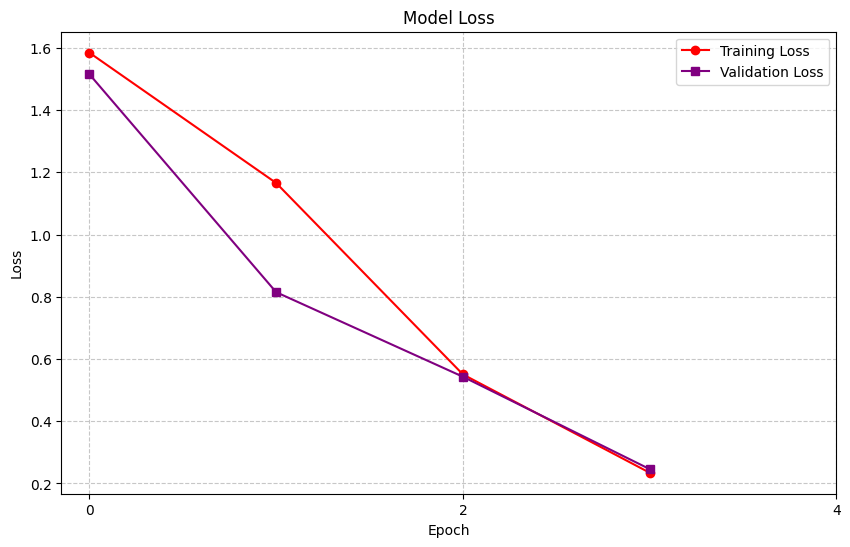

In [32]:
import matplotlib.pyplot as plt

# Dengan asumsi sejarah adalah variabel yang berisi sejarah pelatihan
plt.figure(figsize=(10, 6))  # Sesuaikan ukuran gambar

# Pelatihan plot & nilai kerugian validasi
plt.plot(history.history['loss'], label='Training Loss', color='red', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='purple', marker='s')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Tambahkan garis kisi untuk keterbacaan yang lebih baik
plt.grid(True, linestyle='--', alpha=0.7)

# Sesuaikan tanda centang sumbu x agar lebih mudah dibaca
plt.xticks(range(0, len(history.history['loss'])+1, 2))

# Show plot
plt.show()


*Visualisasi Grafik hasil akurasi*

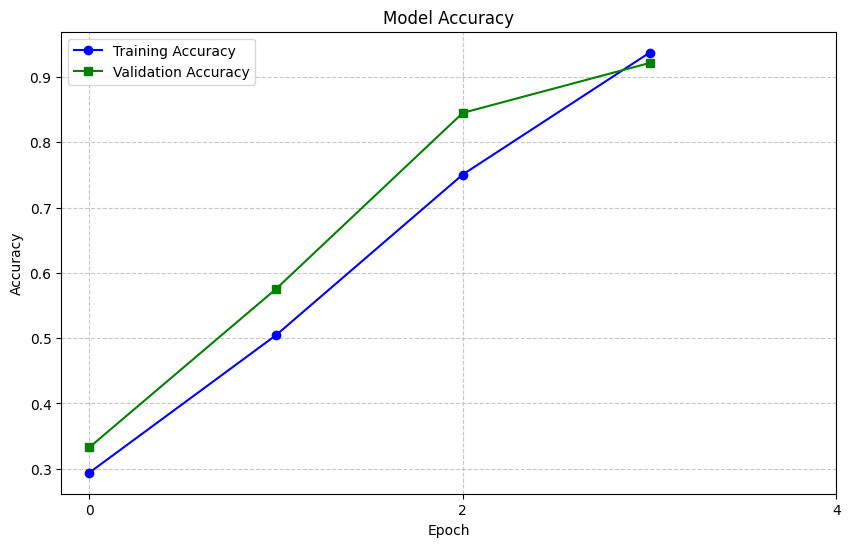

In [31]:
import matplotlib.pyplot as plt

# Dengan asumsi sejarah adalah variabel yang berisi sejarah pelatihan
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Pelatihan plot & nilai kerugian validasi
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green', marker='s')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Tambahkan garis kisi untuk keterbacaan yang lebih baik
plt.grid(True, linestyle='--', alpha=0.7)

# Sesuaikan tanda centang sumbu x agar lebih mudah dibaca
plt.xticks(range(0, len(history.history['accuracy'])+1, 2))

# Show plot
plt.show()

